<a href="https://colab.research.google.com/github/victorjoseij/2nd-trimester/blob/main/2348570_prog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
dt = pd.read_csv('/content/computers.csv')

In [40]:
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Units    14 non-null     int64
 1   Minutes  14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [41]:
dt.isnull().sum()

Units      0
Minutes    0
dtype: int64

In [42]:
mean_value = dt['Minutes'].mean()
mean_value

97.21428571428571

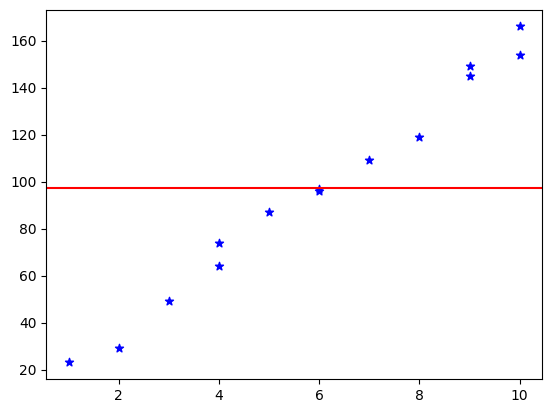

In [43]:
plt.scatter(dt['Units'],dt['Minutes'],color='blue',marker='*')
plt.axhline(y=mean_value,color='red')

In [44]:
minute_model1 = dt['Minutes'].mean()
minute_model2 = 10+12*dt['Units']
minute_model3 = 6+18*dt['Units']
print(minute_model1)
print(minute_model2)
print(minute_model3)

97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [45]:
dt['minute_model1'] = minute_model1
dt['minute_model2'] = minute_model2
dt['minute_model3'] = minute_model3

In [46]:
dt

,Units,Minutes,minute_model1,minute_model2,minute_model3
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


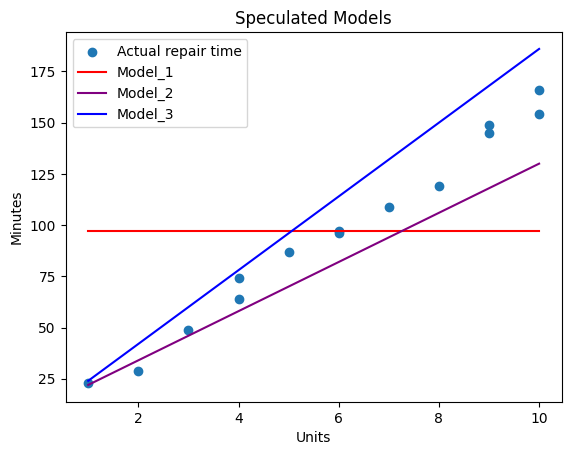

In [47]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data = dt,label='Actual repair time')
ax.plot(dt['Units'],dt['minute_model1'], color='red',label= 'Model_1')
ax.plot(dt['Units'],dt['minute_model2'], color='purple',label= 'Model_2')
ax.plot(dt['Units'],dt['minute_model3'], color='blue',label= 'Model_3')

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()


In [48]:
model_obs1 = pd.DataFrame({'Units': dt['Units'],
                          'Actual Time': dt['Minutes'],
                          'Predicted_value ': dt['minute_model1'],
                          'Error':(dt.minute_model1-dt['Minutes'])

                          })
model_obs1

,Units,Actual Time,Predicted_value,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [49]:
model_obs2 = pd.DataFrame({'Units': dt['Units'],
                          'Actual Time': dt['Minutes'],
                          'Predicted_value ': dt['minute_model2'],
                          'Error':(dt.minute_model2-dt['Minutes'])

                          })
model_obs2

,Units,Actual Time,Predicted_value,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [50]:
model_obs3 = pd.DataFrame({'Units': dt['Units'],
                          'Actual Time': dt['Minutes'],
                          'Predicted_value ': dt['minute_model3'],
                          'Error':(dt.minute_model3-dt['Minutes'])

                          })
model_obs3

,Units,Actual Time,Predicted_value,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [51]:
print(sum(model_obs1['Error']**2))
print(sum(model_obs2['Error']**2))
print(sum(model_obs3['Error']**2))


27768.357142857145
4993
5001


In [52]:
x = dt.Units
y = dt.Minutes

xy = x*y
n = len(dt)

xmean = dt.Units.mean()
ymean = dt.Minutes.mean()

numerator = xy.sum()-n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)

m = numerator/denominator
c = ymean-(m*xmean)

print('intercept-c:',c,'coefficient-m:',m)


intercept-c: 4.161654135338296 coefficient-m: 15.508771929824569


In [53]:
min_best_fit_y = c + m*dt.Units
dt['min_best_fit'] = min_best_fit_y
dt[['Units','Minutes','min_best_fit']]

,Units,Minutes,min_best_fit
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


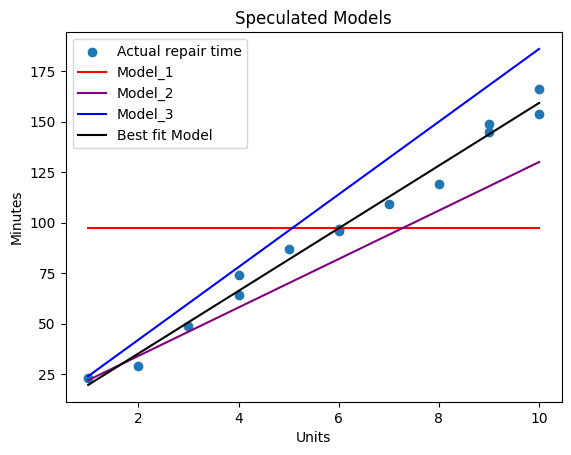

In [54]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data = dt,label='Actual repair time')
ax.plot(dt['Units'],dt['minute_model1'], color='red',label= 'Model_1')
ax.plot(dt['Units'],dt['minute_model2'], color='purple',label= 'Model_2')
ax.plot(dt['Units'],dt['minute_model3'], color='blue',label= 'Model_3')
ax.plot(dt['Units'],dt['min_best_fit'], color='black',label= 'Best fit Model')

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()


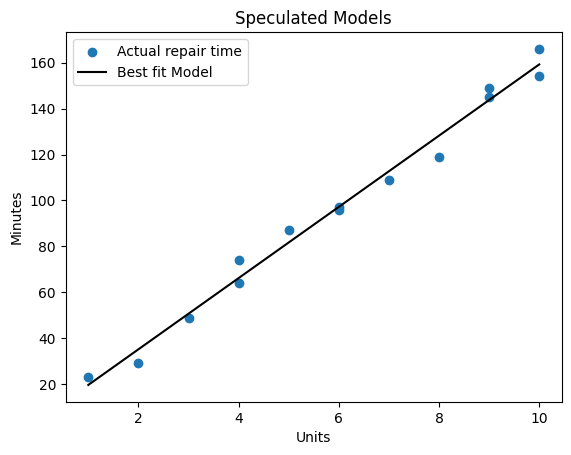

In [55]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data = dt,label='Actual repair time')
ax.plot(dt['Units'],dt['min_best_fit'], color='black',label= 'Best fit Model')

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()

In [56]:
best_fit_error = pd.DataFrame({'Units': dt['Units'],
                          'Actual Time': dt['Minutes'],
                          'Predicted_value ': dt['min_best_fit'],
                          'Error':(dt.min_best_fit-dt['Minutes'])

                          })
print('Best fit error',sum(best_fit_error['Error']**2))
print(sum(model_obs1['Error']**2))
print(sum(model_obs2['Error']**2))
print(sum(model_obs3['Error']**2))

Best fit error 348.848370927318
27768.357142857145
4993
5001


In [57]:
X = dt[['Units']]
Y= dt[['Minutes']]
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [58]:
model.fit(X,Y)

LinearRegression()

In [59]:
print("Intercept:",model.intercept_)
print("Coefficient",model.coef_)
print(m)
print(c)

Intercept: [4.16165414]
Coefficient [[15.50877193]]
15.508771929824569
4.161654135338296


In [60]:
SST = sum((dt.Minutes - dt.Minutes.mean()**2))
SST

-130947.64285714283

In [61]:
SSE = sum(best_fit_error.Error**2)
print("SSE:",SSE)
SSR = SST -SSE
print("SSR:",SSR)
Rsq=SSR/SST
Rsq1 = model.score(dt[['Units']],y)
print( "R2:", Rsq1)

SSE: 348.848370927318
SSR: -131296.49122807014
R2: 0.9874371980620736
